In [161]:
import re
from pathlib import Path  

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
files = [
    "data/ips/amazonia/compactado/2014.csv",
    "data/ips/amazonia/compactado/2018.csv",
    "data/ips/amazonia/compactado/2021.csv"
]

In [33]:
dataset = pd.concat(map(pd.read_csv, files),  ignore_index=True)
dataset

,cibge,municipio,estado,ano,ips,rankips,nhbs,fbes,opts
0,1100015.0,ALTA FLORESTA D'OESTE,RONDONIA,2014.0,56.594170,59.0,60.195511,57.369340,52.217659
1,1100023.0,ARIQUEMES,RONDONIA,2014.0,55.728511,73.0,59.059533,59.304304,48.821695
2,1100031.0,CABIXI,RONDONIA,2014.0,58.915724,92.0,74.178132,54.787265,47.781775
3,1100049.0,CACOAL,RONDONIA,2014.0,61.717654,72.0,72.691093,60.613765,51.848105
4,1100056.0,CEREJEIRAS,RONDONIA,2014.0,54.593926,59.0,62.606094,62.512401,38.663282
...,...,...,...,...,...,...,...,...,...
2314,5108808.0,NOVA GUARITA,MATO GROSSO,2021.0,60.091214,9.0,74.002604,57.876596,48.394443
2315,5108857.0,NOVA MARILÂNDIA,MATO GROSSO,2021.0,56.737212,74.0,60.813618,61.443975,47.954043
2316,5108907.0,NOVA MARINGÁ,MATO GROSSO,2021.0,58.243020,24.0,68.638507,57.400210,48.690342
2317,5108956.0,NOVA MONTE VERDE,MATO GROSSO,2021.0,50.866249,87.0,57.883255,61.307679,33.407812


In [38]:
dataset.estado.unique()

array(['RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA',
       'TOCANTINS', 'MARANHAO', 'MATO GROSSO', nan], dtype=object)

In [34]:
altdf = dataset[(dataset["estado"] == "PARA") & (dataset["municipio"] == "ALTAMIRA")]
altdf

,cibge,municipio,estado,ano,ips,rankips,nhbs,fbes,opts
158,1500602.0,ALTAMIRA,PARA,2014.0,50.954636,95.0,51.004513,64.018909,37.840487
931,1500602.0,ALTAMIRA,PARA,2018.0,52.204457,20.0,57.604134,63.591655,35.417582
1704,1500602.0,ALTAMIRA,PARA,2021.0,52.952657,95.0,63.063402,64.325443,31.469128


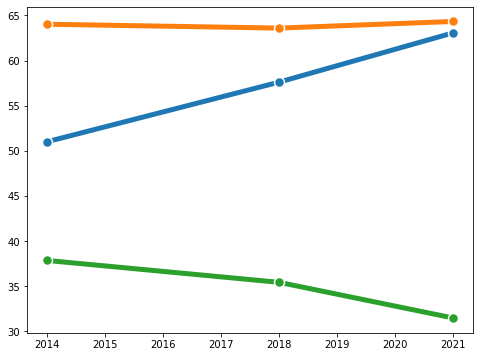

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

indicators = [altdf.nhbs, altdf.fbes, altdf.opts]

for ind in indicators:
    ax.plot(altdf.ano, ind, lw=5)
    ax.scatter(altdf.ano, ind, s=100, lw=1.5, ec="white", zorder=12)

In [36]:
altdf = dataset[(dataset["estado"] == "PARA") & (dataset["municipio"] == "SAO FELIX DO XINGU")]
altdf

,cibge,municipio,estado,ano,ips,rankips,nhbs,fbes,opts
270,1507300.0,SAO FELIX DO XINGU,PARA,2014.0,52.448254,45.0,55.089085,54.332929,47.922747
1043,1507300.0,SAO FELIX DO XINGU,PARA,2018.0,53.146642,15.0,55.376642,54.479403,49.583882
1816,1507300.0,SAO FELIX DO XINGU,PARA,2021.0,52.935779,94.0,58.380642,52.470069,47.956625


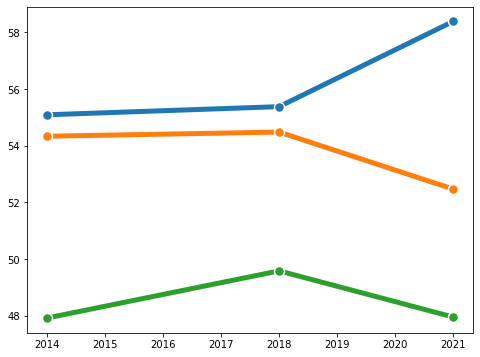

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

indicators = [altdf.nhbs, altdf.fbes, altdf.opts]

for ind in indicators:
    ax.plot(altdf.ano, ind, lw=5)
    ax.scatter(altdf.ano, ind, s=100, lw=1.5, ec="white", zorder=12)

In [5]:
import re
import pandas as pd
from pathlib import Path

SPI_PATH = "data/spi/amazonia"
with pd.ExcelFile(f"{SPI_PATH}/ips_tabela_completa.xlsx") as xlsx:
    
    for sheetname in xlsx.sheet_names:
        # Recupera o ano a partir do nome da aba
        match_years = re.findall(r'.*([1-3][0-9]{3})', sheetname)

        if len(match_years) > 0:
            select_year = int(match_years[0])
            
            # Carregar os dados releacionados a aba cujo nome esta referenciado pela variável sheetname
            dataset = pd.read_excel(xlsx, sheetname)
            dataset.rename(columns=lambda x: x.strip(), inplace=True)
            
            # Adiciona a feature ano
            dataset.insert(0, "Ano",select_year)
            
            # Padroniza o nome da coluna 3 retirando o ano do final
            dataset.rename(columns={ dataset.columns[4]: "IPS Amazônia" }, inplace=True)
            
            # Cria um novo arquivo csv com o nome do ano presente em sheetname.
            detailed_filepath = Path(f"{SPI_PATH}/detailed/{select_year}.csv")
            detailed_filepath.parent.mkdir(parents=True, exist_ok=True)
            dataset.to_csv(detailed_filepath, index=False)

In [66]:
# ips_2014 = ips_2014[["ano", "Estado", "Município", "IPS Amazônia 2014", "Ranking IPS", "Necessidades Humanas Básicas", "Fundamentos para o Bem-Estar", "Oportunidades"]]